In [1]:
# Goal: Predict NO2 concentration an hour in advance from meteorological and pollutant data.

In [2]:
# Import dependecies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset and confirm it's there
df = pd.read_csv("../data/AirQualityUCI.csv", sep=";", decimal=",")
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
Before doing some explanatory data analysis, we need to clean the data as we can see the tail has NaN values 

In [4]:
# Creating a copy for cleaning data and dropping all empty rows
df_drop = df.dropna(how = "all").copy()
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN


In [5]:
# Change Time format HH.MM.SS to HH:MM:SS
df_drop["Time"] = df_drop["Time"].str.replace(".", ":", regex=False)

# Create a new col by combining Date and Time (useful for time series)
df_drop["Datetime"] = pd.to_datetime(df_drop["Date"] + " " + df_drop["Time"], dayfirst=True)

# Set Datetime as index (useful for time series operations)
df_drop.set_index("Datetime", inplace=True)

display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Datetime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN


In [6]:
# Drop columns "Unamed 15" and "Unamed 16" if all entries are NaN
print(f"Before Drop: {list(df_drop.columns.values)}", end="\n\n") # Before drop

unamed_cols = ["Unnamed: 15", "Unnamed: 16"]
for col in unamed_cols:
    if df_drop[col].isna().all():
        df_drop = df_drop.drop(columns=[col])
        
print(f"After Drop: {list(df_drop.columns.values)}") # After drop

Before Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']

After Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


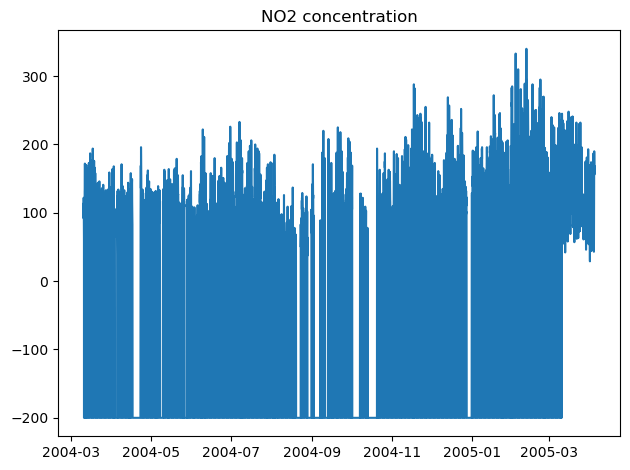

In [7]:
# simple NO2 plot to quickly check inordinary values/readings
plt.plot(df_drop["NO2(GT)"])
plt.title("NO2 concentration")
plt.tight_layout()
plt.show()

In [8]:
# Values with -200 likekly a placeholder for invalid or missing data
df_drop.replace(-200, np.nan, inplace=True)
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [9]:
# Checking how much data is missing from a given column
missing_percent = df_drop.isna().mean() * 100
missing_table = pd.DataFrame(missing_percent.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table)

,Missing Values in %
NMHC(GT),90.231912
CO(GT),17.986534
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


In [10]:
# NMHC(GT) is missing ~90% of its data, so we drop the feature (not worth salvaging)
df_drop.drop(columns=["NMHC(GT)"], inplace=True)

In [11]:
# For the remaining columns, I've decided to impute them with the median if
# the skewness is > 0.5 or < -0.5. Otherwise impute with the means
print(df_drop["NO2(GT)"].skew(), df_drop["NOx(GT)"].skew())

0.6217143134373714 1.7157807992815408


In [12]:
# Imputed remaining columns with the median
# NO2(GT), NOx(GT) and CO(GT) is missing ~17% of its data, replace NaN with median
df_drop["NO2(GT)"] = df_drop["NO2(GT)"].fillna(df_drop["NO2(GT)"].median())
df_drop["NOx(GT)"] = df_drop["NOx(GT)"].fillna(df_drop["NOx(GT)"].median())
df_drop["CO(GT)"] = df_drop["CO(GT)"].fillna(df_drop["CO(GT)"].median())

# Columns missing ~4% of its data, replace NaN with median
remaining_cols = [
    "C6H6(GT)",
    "PT08.S1(CO)",
    "PT08.S2(NMHC)",
    "PT08.S3(NOx)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)",
    "T",
    "RH",
    "AH"
]

for col in remaining_cols:
    df_drop[col] = df_drop[col].fillna(df_drop[col].median())

In [13]:
# Verifying if the data was properly cleaned and imputed
for col in df_drop.columns:
    print(f"NaN's in {col} {df_drop[col].isna().sum()}")

NaN's in Date 0
NaN's in Time 0
NaN's in CO(GT) 0
NaN's in PT08.S1(CO) 0
NaN's in C6H6(GT) 0
NaN's in PT08.S2(NMHC) 0
NaN's in NOx(GT) 0
NaN's in PT08.S3(NOx) 0
NaN's in NO2(GT) 0
NaN's in PT08.S4(NO2) 0
NaN's in PT08.S5(O3) 0
NaN's in T 0
NaN's in RH 0
NaN's in AH 0


In [14]:
# Verifying if the data was properly cleaned and imputed
missing_percent_check = df_drop.isna().mean() * 100
missing_table_check = pd.DataFrame(missing_percent_check.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table_check)

,Missing Values in %
Date,0.0
Time,0.0
CO(GT),0.0
PT08.S1(CO),0.0
C6H6(GT),0.0
PT08.S2(NMHC),0.0
NOx(GT),0.0
PT08.S3(NOx),0.0
NO2(GT),0.0
PT08.S4(NO2),0.0


In [15]:
# Created a copy of the cleaned data to avoid modifying the original by reference
D = df_drop.copy()
display(D)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


## Exploratory Data Analysis (EDA) and Feature Selection

Before we go modeling our predictive NO2 model we need to first analyse the data, it's trends and select which features will help with model training. A quick google search shows that the emissions of nitrogen dioxide (NO2) mainly comes from automotives, power plants, gas appliances, etc... With health risks ranging from coughing/wheezing to more severe cases of developing asthma and being at risk of respiratory infection when exposed to NO2 for prologue exposures. NO2 concentration also closely correlates with human activity so predicting emissions could help spread awareness and help control unregulated emissions.<br>

Since this is a time series forcasting problem, we would need to prepare our data in such a way that the models could intrepret time.

Sources:
1. https://www.epa.gov/no2-pollution
2. https://www.canada.ca/en/health-canada/services/air-quality/indoor-air-contaminants/nitrogen-dioxide.html
3. https://www.eea.europa.eu/en/analysis/publications/air-quality-status-report-2025/nitrogen-dioxide
4. https://en.wikipedia.org/wiki/NOx

In [16]:
# Exploring all features (except for date and time)
cols_to_explore = []
for col in D.columns:
    if col not in ["Date", "Time"]:
        cols_to_explore.append(col)
print(cols_to_explore)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


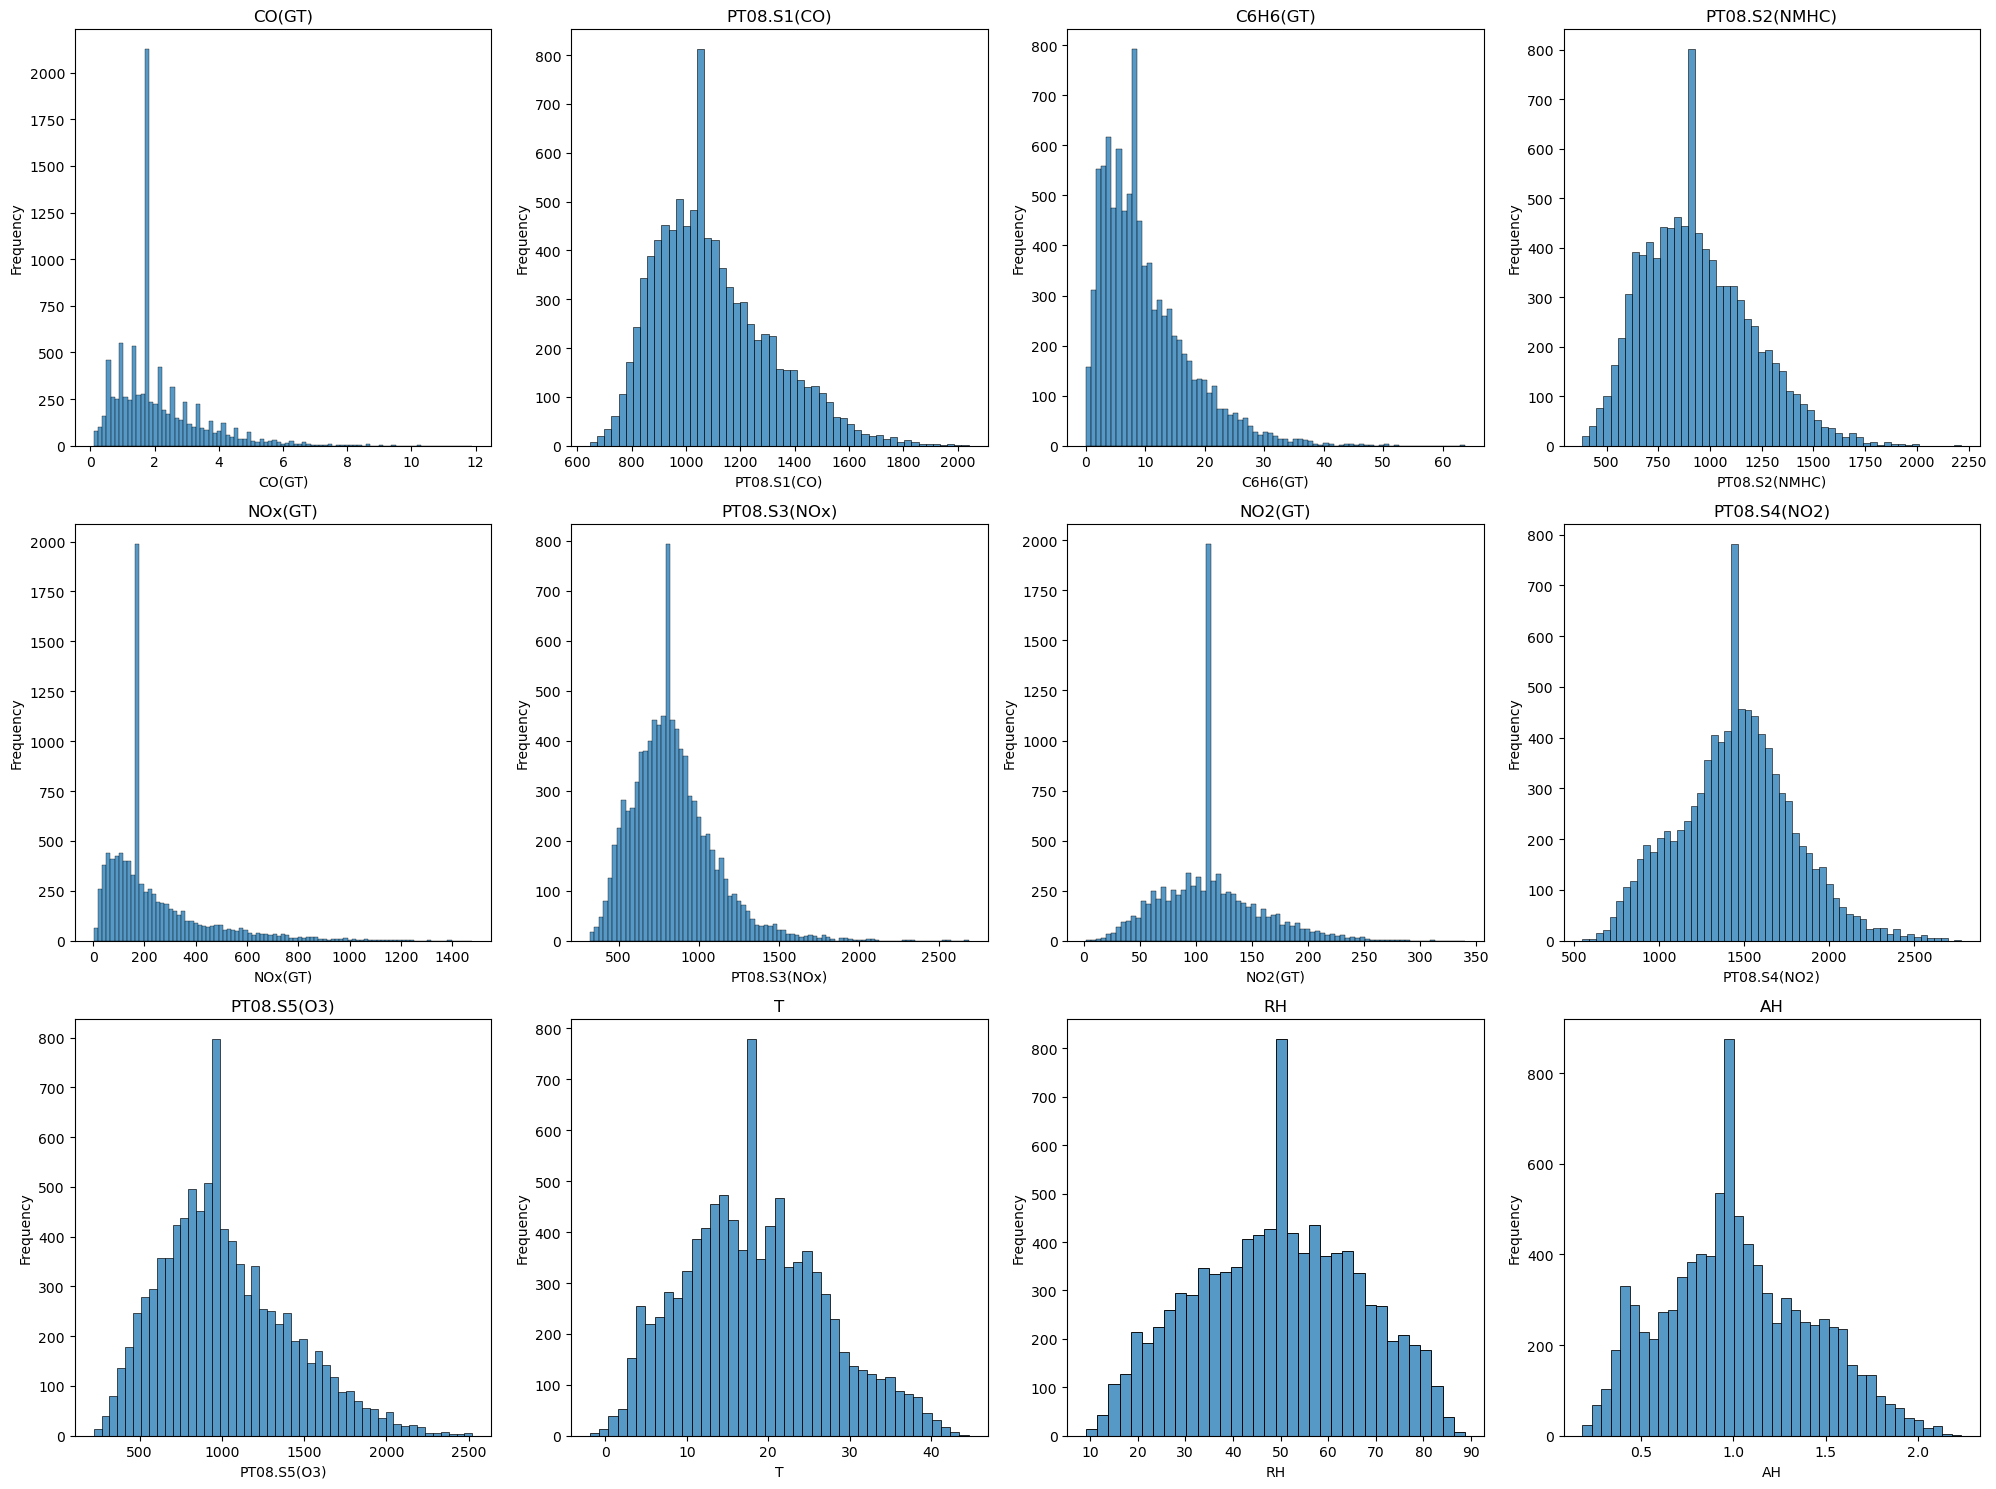

In [17]:
# Histogram
fig, axes = plt.subplots(3, 4, figsize=(20, 15)) 
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(cols_to_explore):
    sns.histplot(D[col], bins="auto", ax=axes[i]) # change y coords to D[col] to date
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Correlation Analysis
Before adding every feature into our models, I want to explore the correlations between features with NO2. A concern that might arise from this would be **multicollinearity** for linear models so we would need a way to handle them. We could either do regularization (ridge or lasso) or calculate the variance inflation factor (VIF) where VIF > 10 indicates a high multicollinearity (where we could either drop or combine it with other features)

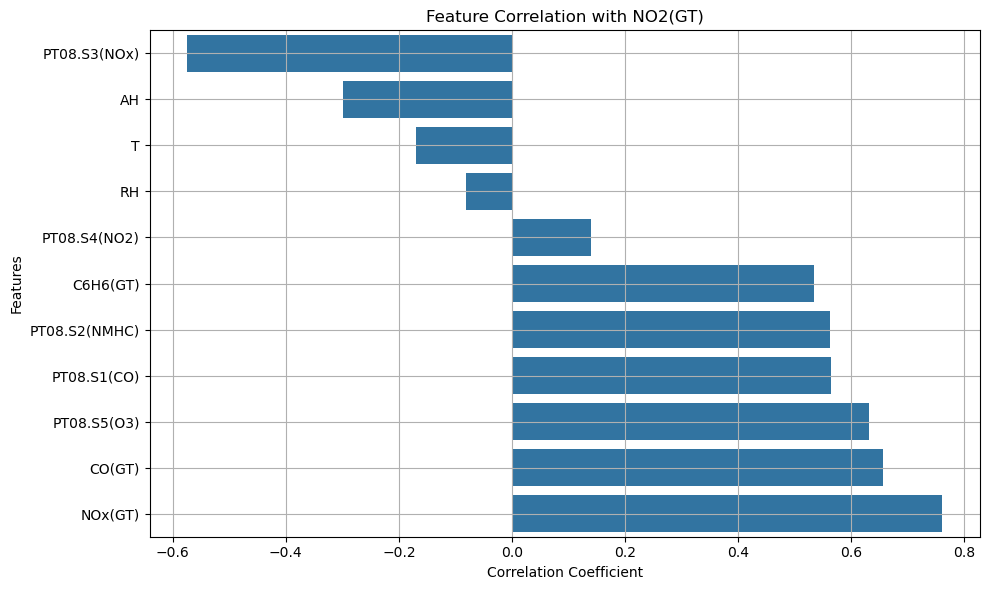

In [18]:
# Bar plot of the correlations between features and NO2(GT)
target_corr = D[cols_to_explore].corr()["NO2(GT)"].drop("NO2(GT)").sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with NO2(GT)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
corr_df = target_corr.reset_index()
corr_df.columns = ["Feature", "Correlation with NO2(GT)"]
print(corr_df.to_string(index=False))

      Feature  Correlation with NO2(GT)
 PT08.S3(NOx)                 -0.574181
           AH                 -0.298206
            T                 -0.169380
           RH                 -0.082135
 PT08.S4(NO2)                  0.139986
     C6H6(GT)                  0.533313
PT08.S2(NMHC)                  0.561938
  PT08.S1(CO)                  0.563442
  PT08.S5(O3)                  0.630425
       CO(GT)                  0.656002
      NOx(GT)                  0.760716


In [20]:
# Focusing on features with stronger correlation to NO2, corr > 0.5 to avoid over-interpreting weak/noisy associations
strong_cols_corr = [col for col in target_corr.index if round(abs(target_corr[col]), 3) > 0.5]
print(strong_cols_corr)

['PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'CO(GT)', 'NOx(GT)']


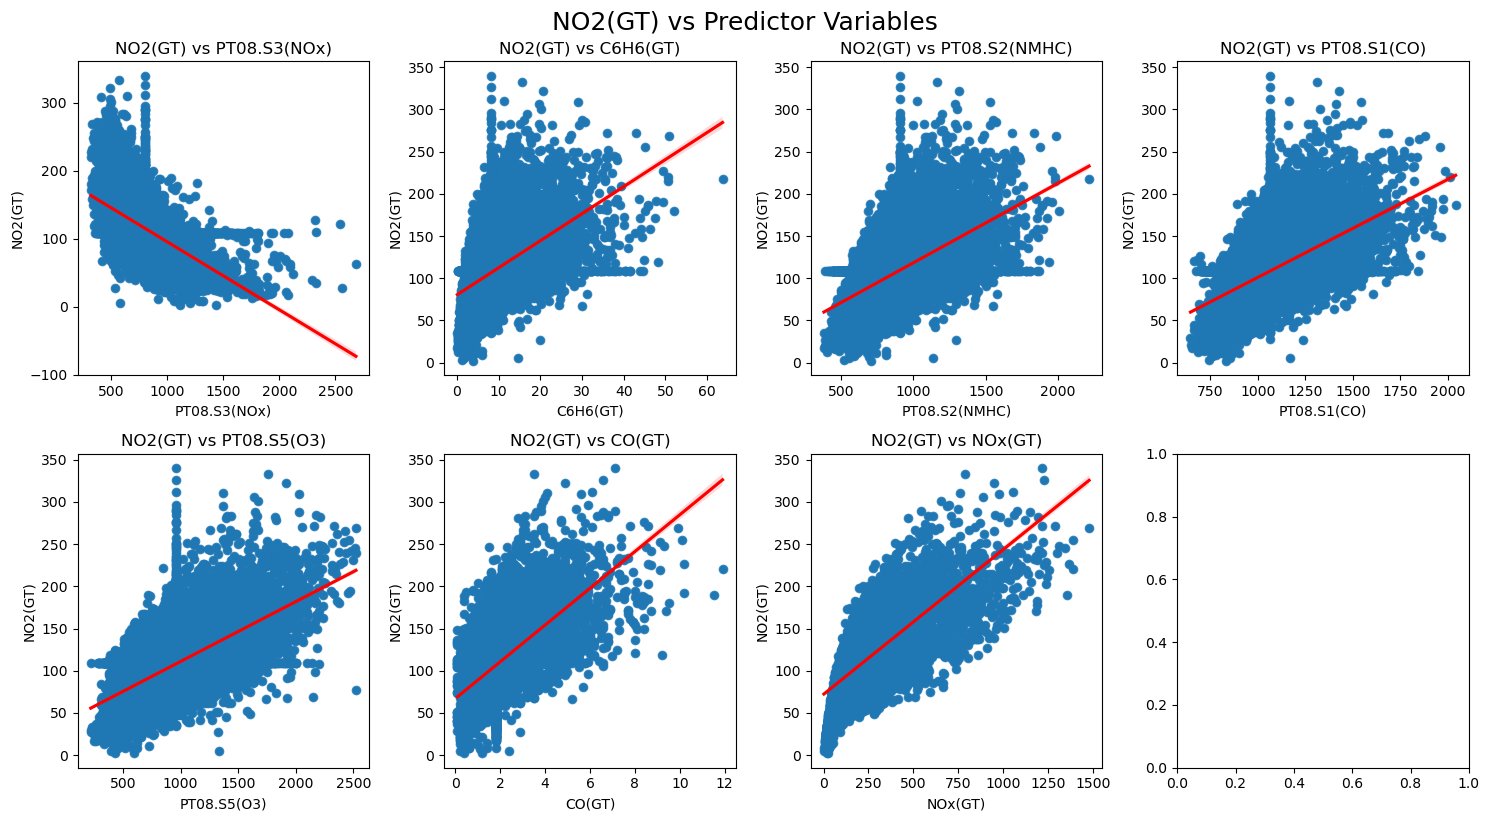

In [21]:
# Scatter plot of all strong cols corr

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(strong_cols_corr):
    # if col != "NO2(GT)":
    sns.scatterplot(data=D, x=col, y="NO2(GT)", ax=axes[i])
    sns.regplot(data=D, x=col, y="NO2(GT)", line_kws={"color":"red"}, ax=axes[i])
    axes[i].set_title(f"NO2(GT) vs {col}")

plt.tight_layout()
plt.suptitle("NO2(GT) vs Predictor Variables", fontsize=18, y=1.02)
plt.show()

### Time series analysis

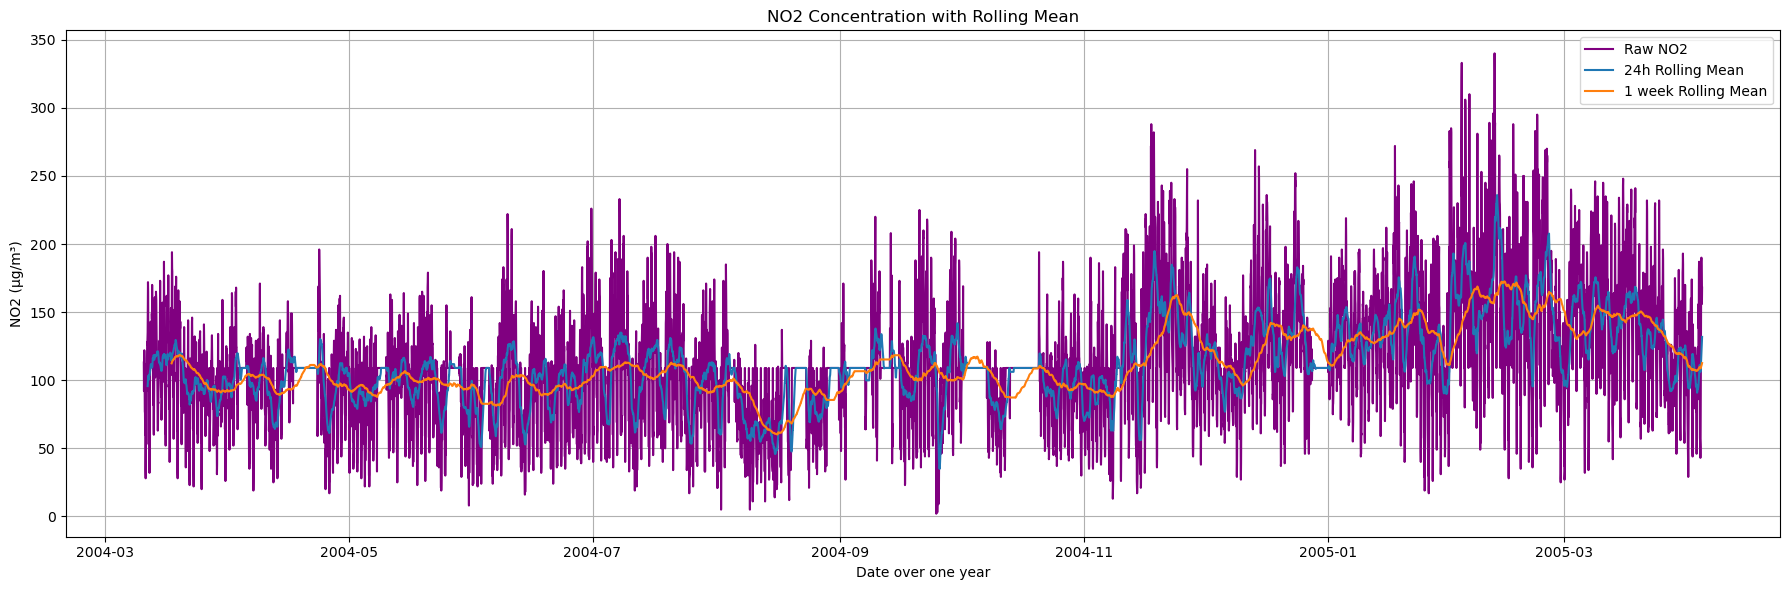

In [22]:
# Time series plot with rolling mean
NO2_rolling_mean_day = D["NO2(GT)"].rolling(window=24).mean()
NO2_rolling_mean_week = D["NO2(GT)"].rolling(window=168).mean()


plt.figure(figsize=(18, 6))
plt.plot(D.index, D["NO2(GT)"], label="Raw NO2", color="purple")
plt.plot(D.index, NO2_rolling_mean_day, label="24h Rolling Mean")
plt.plot(D.index, NO2_rolling_mean_week, label="1 week Rolling Mean")
plt.grid(True)
plt.xlabel("Date over one year")
plt.ylabel("NO2 (µg/m³)")
plt.title("NO2 Concentration with Rolling Mean")

plt.legend()
plt.tight_layout()
plt.show()

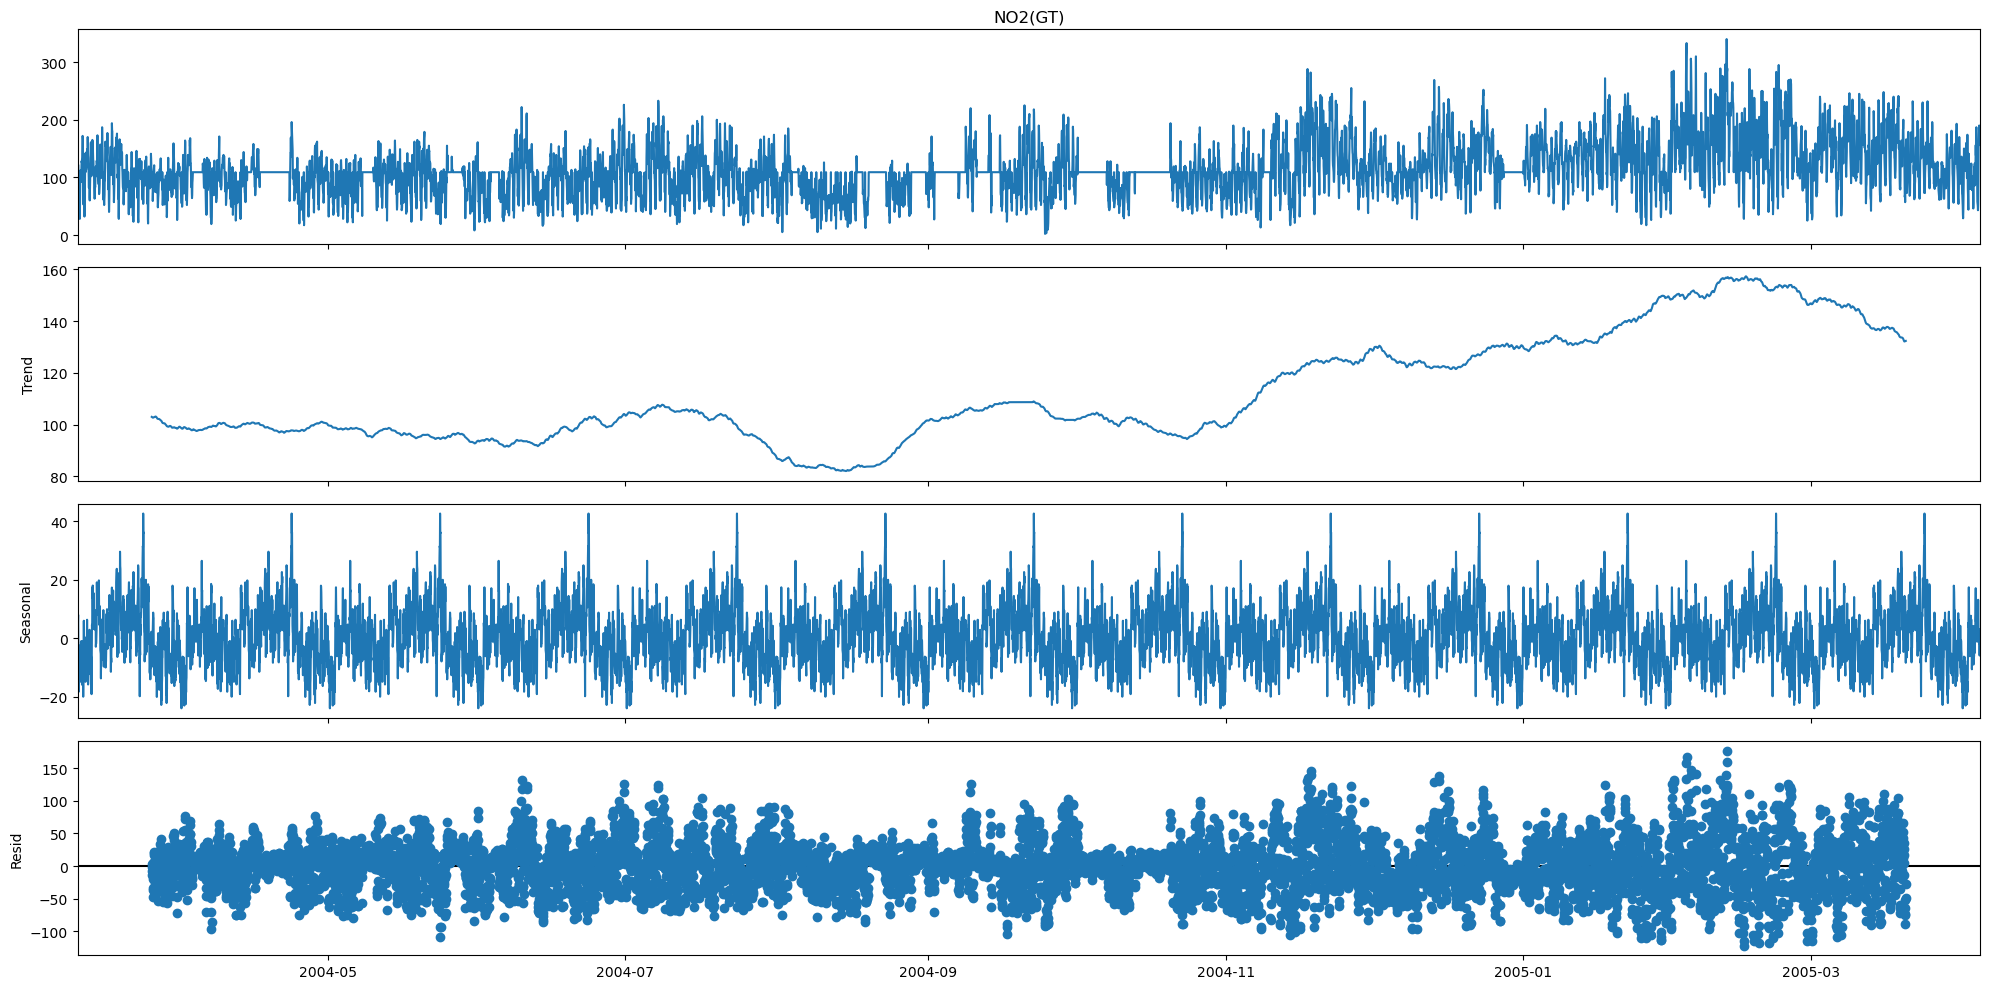

In [23]:
# Decomposing time serie to uncover trends, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(D["NO2(GT)"], model='additive', period=730)
fig = result.plot()
fig.set_size_inches(20, 10)
plt.tight_layout()
plt.show()

In [380]:
# Checking if NO2 is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(D["NO2(GT)"].dropna())  # Drop NaNs if any
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value < 0.05: The series is likely stationary.
# If p-value ≥ 0.05: The series is not stationary.

ADF Statistic: -8.087818933812665
p-value: 1.4043150355560522e-12


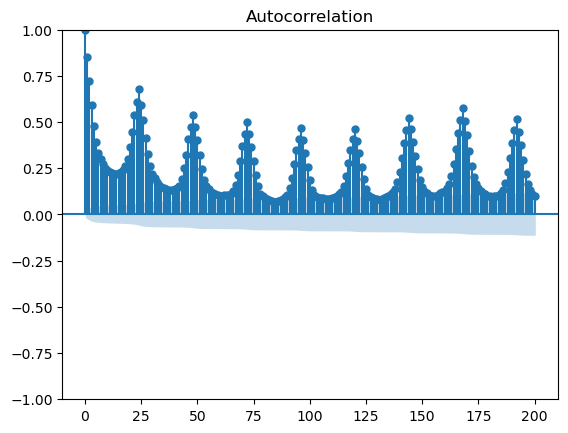

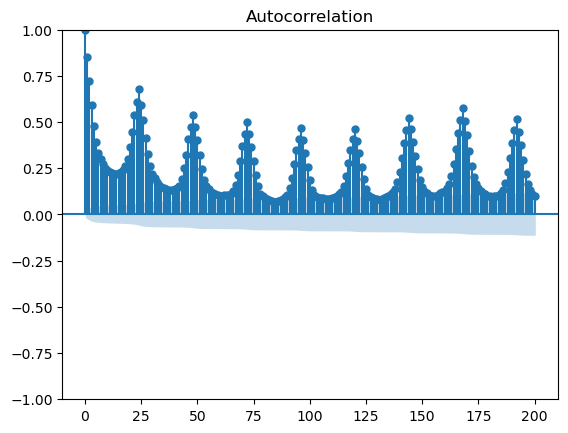

In [381]:
#######################################################################################
# ? How to intrepret
# How many Lags should we add? Use autocorrelation plots (ACF):
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D["NO2(GT)"], lags=200)

### Creating Lag Features (Feature engineering)
We're building supervised models (RF, SVR, etc..) and so we're predicting no2 at time t+1 using data from time t, t-1, t-2, ..., t-n which means we need to shift our target forward (shift(-1)), and the input backward (shift(lag))

In [24]:
# We want to predict NO2 at t+1 from data at t
D["NO2_t+1"] = D["NO2(GT)"].shift(-1) # our target is NO2_t+1

# Create lag features for NO2 to help capture autocorrelation (as NO2 are autocorrelated recent past values heavily influence the current value)
# lags_no2 = [1, 2, 3, 6, 12, 24]
lags_no2 = [1, 2, 3, 6, 12, 24, 48, 168]


for lag in lags_no2:
    D[f"NO2_lag_{lag}"] = D["NO2(GT)"].shift(lag)

for col in strong_cols_corr:
    for lag in lags_no2:
        D[f"{col}_lag_{lag}"] = D[col].shift(lag)


# After creating lags, create rolling features for tree based models and SVR (after scaling)
rolling_windows = [3, 6, 12, 24]

new_features = []

for col in strong_cols_corr:
    for window in rolling_windows:
        roll_mean = D[col].shift(1).rolling(window).mean()
        roll_std = D[col].shift(1).rolling(window).std()
        diff = D[col].shift(1) - D[col].shift(window)

        roll_mean.name = f"{col}_roll_mean_{window}"
        roll_std.name = f"{col}_roll_std_{window}"
        diff.name = f"{col}_diff_{window}"

        new_features.extend([roll_mean, roll_std, diff])

# Concatenate all at once
D = pd.concat([D] + new_features, axis=1)


# Adding time-based features
D["hour"] = D.index.hour
D["dayofweek"] = D.index.dayofweek
D["month"] = D.index.month

# cyclical encoding of hour (captures periodicity better) alternative to one hot encoding
D["hour_sin"] = np.sin(2 * np.pi * D["hour"] / 24)
D["hour_cos"] = np.cos(2 * np.pi * D["hour"] / 24)

D["day_sin"] = np.sin(2 * np.pi * D["dayofweek"] / 7)
D["day_cos"] = np.cos(2 * np.pi * D["dayofweek"] / 7)

print(f"Data shape before dropna: {D.shape}")
D = D.dropna() # drops NaN from shifting
print(f"Data shape after dropna: {D.shape}")

# Verifying if the data has any NaN values
nan_found = False
for col in D.columns:
    if D[col].isna().sum() != 0:
        print(f"NaN Value found in {col}")
        nan_found = True

if not nan_found:
    print("No NaN was found")

Data shape before dropna: (9357, 170)
Data shape after dropna: (9188, 170)
No NaN was found


In [25]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_low_vif_features(X, thresh=10.0):
    """
    Filters features in X by removing those with VIF above the threshold.

    Parameters:
    -----------
    X : pd.DataFrame
        DataFrame containing input features only (no target).
    thresh : float
        VIF threshold (default = 10.0)

    Returns:
    --------
    filtered_features : list of str
        Feature names with VIF < threshold.
    vif_df : pd.DataFrame
        Full VIF report including dropped features.
    """
    # Drop non-numeric columns
    X = X.select_dtypes(include=["number"]).dropna().copy()
    X_with_const = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    # Remove constant/intercept
    vif_data = vif_data[vif_data["feature"] != "const"]

    # Filtered features
    filtered = vif_data[vif_data["VIF"] < thresh]
    filtered_features = filtered["feature"].tolist()

    return filtered_features, vif_data


all_input_features = [col for col in D.columns if col != "NO2_t+1"]

# Step 1: Get VIF-filtered features
filtered_features_cols, vif_report = get_low_vif_features(D[all_input_features])

# Step 2: Prepare X and y
X = D[filtered_features_cols]
y = D["NO2_t+1"]

c:\Users\322jl\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [505]:
# Show full VIF table
print("\n🔍 Full VIF Report (Before Filtering):")
print(vif_report.sort_values(by="VIF", ascending=False).to_string(index=False))

# Show filtered feature names
print("\n✅ Filtered Features (VIF < 10):")
print(filtered_features_cols)

# Show which ones were dropped
dropped = set(vif_report["feature"]) - set(filtered_features_cols)
print(f"\n❌ Dropped due to high VIF (>10): {list(dropped)}")


🔍 Full VIF Report (Before Filtering):
                   feature          VIF
 PT08.S2(NMHC)_roll_mean_3          inf
         PT08.S1(CO)_lag_2          inf
        PT08.S3(NOx)_lag_2          inf
   PT08.S1(CO)_roll_mean_3          inf
       PT08.S2(NMHC)_lag_2          inf
  PT08.S3(NOx)_roll_mean_3          inf
             CO(GT)_diff_6 8.240555e+06
        PT08.S1(CO)_diff_6 7.795645e+06
            CO(GT)_diff_24 3.715308e+06
       PT08.S3(NOx)_diff_6 3.070929e+06
             NOx(GT)_lag_3 2.969637e+06
            NOx(GT)_diff_6 2.682725e+06
           NOx(GT)_diff_24 2.226566e+06
       PT08.S3(NOx)_diff_3 1.954903e+06
            NOx(GT)_diff_3 1.741989e+06
     PT08.S2(NMHC)_diff_24 1.541390e+06
             NOx(GT)_lag_1 1.534063e+06
      PT08.S2(NMHC)_diff_6 1.104054e+06
            NOx(GT)_lag_12 8.024508e+05
           C6H6(GT)_diff_3 5.416592e+05
          C6H6(GT)_diff_12 4.814892e+05
             NOx(GT)_lag_2 4.360936e+05
           C6H6(GT)_diff_6 4.347282e+05
 

### Model Selection

In [506]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler # Linear and SVR models
# Defining my features and target
# X = D[filtered_features_cols] # Features
# y = D["NO2_t+1"] # Target

# Time-aware train/test split
train = D[:"2004-12-31"]
test = D["2005-01-01":]

X_train, X_test = train[filtered_features_cols], test[filtered_features_cols]
y_train, y_test = train["NO2_t+1"], test["NO2_t+1"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [507]:
# Linear Regression (Baseline Model)
from sklearn.linear_model import LinearRegression

# Fitting Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model Prediction
lr_y_predict = lr_model.predict(X_test_scaled)

# Evaluate Model
mse = mean_squared_error(y_test, lr_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lr_y_predict)
r2 = r2_score(y_test, lr_y_predict)

print(f"Linear Regression Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Most Recent:
# Linear Regression Results:
# MAE:  31.46
# RMSE: 41.69
# R²:   0.3233

Linear Regression Results:
MAE:  31.46
RMSE: 41.69
R²:   0.3233


In [ ]:
importance = pd.Series(lr_model.coef_, index=X_train.columns)
importance = importance.sort_values(key=abs, ascending=False)
print(importance)

NO2_lag_24             10.233336
hour_cos              -10.043087
NO2_lag_6               9.053994
CO(GT)_lag_6           -6.535923
dayofweek              -6.053330
NO2_lag_12              5.467229
NOx(GT)_lag_6           5.422787
NOx(GT)_lag_12         -4.424519
hour                    3.643368
hour_sin               -3.313891
CO(GT)_lag_24           3.144885
day_cos                -2.969253
month                   2.200611
PT08.S3(NOx)_lag_24     1.780989
NOx(GT)_lag_24          0.910621
day_sin                 0.688389
CO(GT)_lag_12           0.559660
dtype: float64


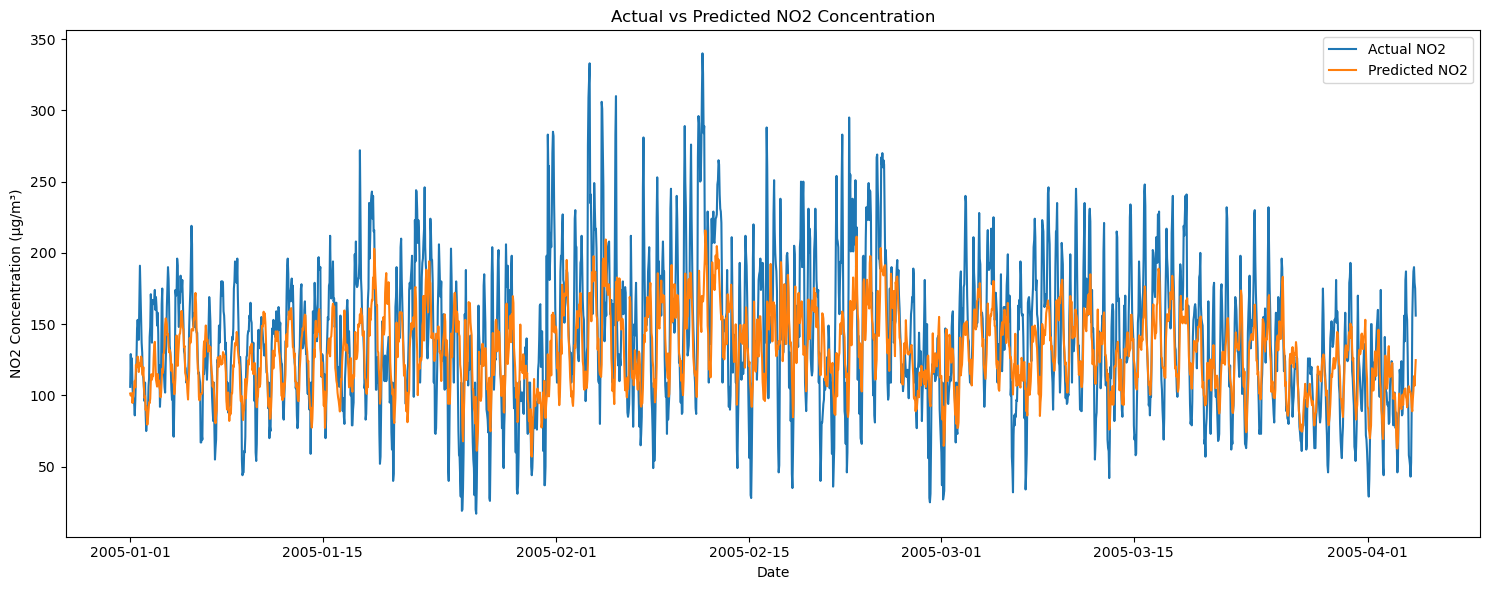

In [256]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test.index, y_test, label="Actual NO2")
# Predicted NO2
plt.plot(y_test.index, lr_y_predict, label="Predicted NO2")

plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [257]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

############################################### SUGGESTIONS
# Define hyperparameter grid
param_grid = {
    "svr__C": [1, 10, 100],
    "svr__gamma": ['scale', 0.01, 0.1],
    "svr__epsilon": [0.01, 0.1, 0.5]
}

# Create pipeline
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Grid search
grid = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best model found
print("Best parameters:", grid.best_params_)

# Predict with the best model
svr_y_predict = grid.predict(X_test)
###############################################

# Evaluate Model
mse = mean_squared_error(y_test, svr_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, svr_y_predict)
r2 = r2_score(y_test, svr_y_predict)

print(f"SVR Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Best parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 0.01}
SVR Results:
MAE:  30.76
RMSE: 40.48
R²:   0.3620


In [ ]:
# Best parameters: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__gamma': 'scale'}
# SVR Results:
# MAE:  38.90
# RMSE: 49.83
# R²:   0.0330

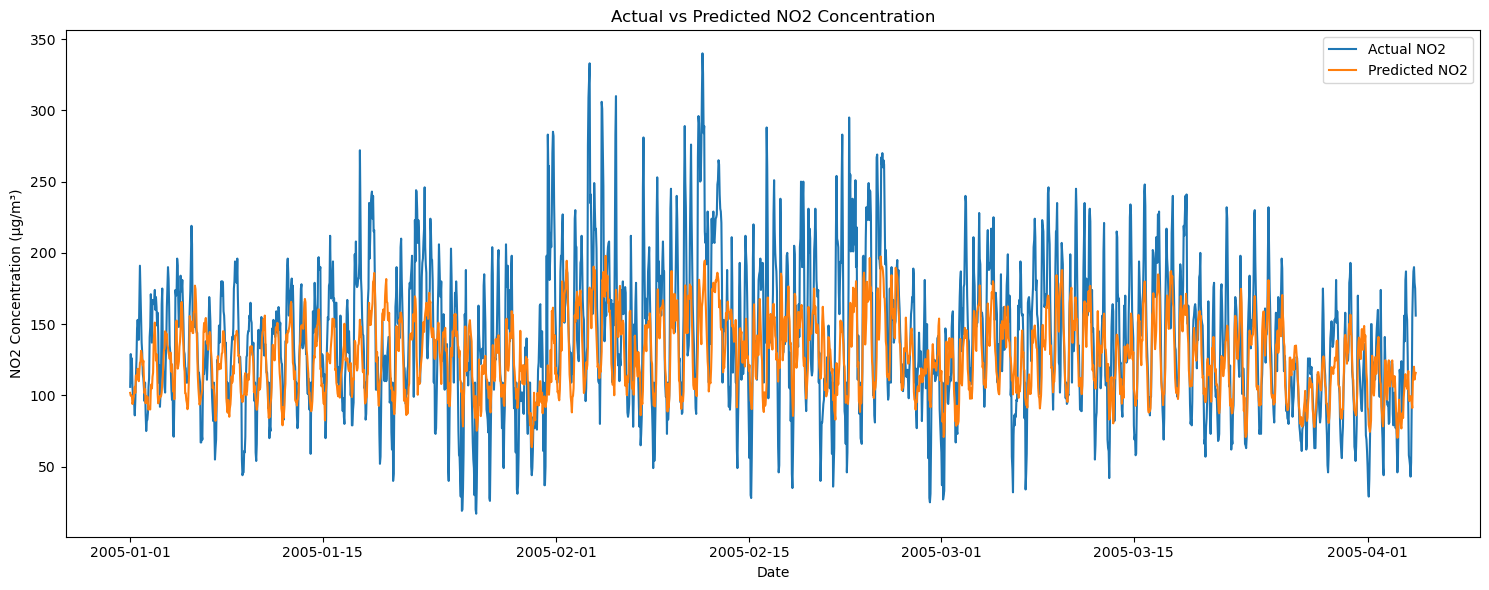

In [258]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test.index, y_test, label="Actual NO2")
# Predicted NO2
plt.plot(y_test.index, svr_y_predict, label="Predicted NO2")

plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [277]:
######################## SUGGESTIONS
# # 1. Build list of lagged features
# rf_features = []
# for col in strong_cols_corr:
#     for lag in lags_no2:
#         lagged_col = f"{col}_lag_{lag}"
#         if lagged_col in D.columns:
#             rf_features.append(lagged_col)

# # 2. Add time-based features too, if you want
# time_features = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month']
# for t_col in time_features:
#     if t_col in D.columns:
#         rf_features.append(t_col)

no2_lags = [f"NO2_lag_{lag}" for lag in lags_no2]
rf_features = []

# Start with lag features of strongly correlated variables
for col in strong_cols_corr:
    for lag in lags_no2:
        rf_features.append(f"{col}_lag_{lag}")

# Add NO2 lags too
rf_features += no2_lags

# Optionally add time features (for tree models this can help)
rf_features += ["hour", "dayofweek", "month", "hour_sin", "hour_cos", "day_sin", "day_cos"]
print(rf_features)

['PT08.S3(NOx)_lag_1', 'PT08.S3(NOx)_lag_2', 'PT08.S3(NOx)_lag_3', 'PT08.S3(NOx)_lag_6', 'PT08.S3(NOx)_lag_12', 'PT08.S3(NOx)_lag_24', 'PT08.S3(NOx)_lag_48', 'PT08.S3(NOx)_lag_168', 'C6H6(GT)_lag_1', 'C6H6(GT)_lag_2', 'C6H6(GT)_lag_3', 'C6H6(GT)_lag_6', 'C6H6(GT)_lag_12', 'C6H6(GT)_lag_24', 'C6H6(GT)_lag_48', 'C6H6(GT)_lag_168', 'PT08.S2(NMHC)_lag_1', 'PT08.S2(NMHC)_lag_2', 'PT08.S2(NMHC)_lag_3', 'PT08.S2(NMHC)_lag_6', 'PT08.S2(NMHC)_lag_12', 'PT08.S2(NMHC)_lag_24', 'PT08.S2(NMHC)_lag_48', 'PT08.S2(NMHC)_lag_168', 'PT08.S1(CO)_lag_1', 'PT08.S1(CO)_lag_2', 'PT08.S1(CO)_lag_3', 'PT08.S1(CO)_lag_6', 'PT08.S1(CO)_lag_12', 'PT08.S1(CO)_lag_24', 'PT08.S1(CO)_lag_48', 'PT08.S1(CO)_lag_168', 'PT08.S5(O3)_lag_1', 'PT08.S5(O3)_lag_2', 'PT08.S5(O3)_lag_3', 'PT08.S5(O3)_lag_6', 'PT08.S5(O3)_lag_12', 'PT08.S5(O3)_lag_24', 'PT08.S5(O3)_lag_48', 'PT08.S5(O3)_lag_168', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3', 'CO(GT)_lag_6', 'CO(GT)_lag_12', 'CO(GT)_lag_24', 'CO(GT)_lag_48', 'CO(GT)_lag_168', '

In [387]:
# Shift target column
D["NO2_t+1"] = D["NO2(GT)"].shift(-1)

# Create lag features
lags_no2 = [1, 2, 3, 6, 12, 24, 48, 168]
rolling_windows = [3, 6, 12, 24]
new_features = []

# NO2 lags
for lag in lags_no2:
    D[f"NO2_lag_{lag}"] = D["NO2(GT)"].shift(lag)

# NO2 rolling features
for window in rolling_windows:
    roll_mean = D["NO2(GT)"].shift(1).rolling(window).mean().rename(f"NO2_roll_mean_{window}")
    roll_std = D["NO2(GT)"].shift(1).rolling(window).std().rename(f"NO2_roll_std_{window}")
    diff = (D["NO2(GT)"].shift(1) - D["NO2(GT)"].shift(window)).rename(f"NO2_diff_{window}")
    new_features.extend([roll_mean, roll_std, diff])

# Other features
for col in strong_cols_corr:
    for lag in lags_no2:
        D[f"{col}_lag_{lag}"] = D[col].shift(lag)

for col in strong_cols_corr:
    for window in rolling_windows:
        roll_mean = D[col].shift(1).rolling(window).mean().rename(f"{col}_roll_mean_{window}")
        roll_std = D[col].shift(1).rolling(window).std().rename(f"{col}_roll_std_{window}")
        diff = (D[col].shift(1) - D[col].shift(window)).rename(f"{col}_diff_{window}")
        new_features.extend([roll_mean, roll_std, diff])

# Add all new rolling features
D = pd.concat([D] + new_features, axis=1)

# Create time-based features all at once to avoid fragmentation
time_features = pd.DataFrame(index=D.index)
time_features["hour"] = D.index.hour
time_features["dayofweek"] = D.index.dayofweek
time_features["month"] = D.index.month
time_features["hour_sin"] = np.sin(2 * np.pi * time_features["hour"] / 24)
time_features["hour_cos"] = np.cos(2 * np.pi * time_features["hour"] / 24)
time_features["day_sin"] = np.sin(2 * np.pi * time_features["dayofweek"] / 7)
time_features["day_cos"] = np.cos(2 * np.pi * time_features["dayofweek"] / 7)

# Add time features all at once to avoid fragmentation
D = pd.concat([D, time_features], axis=1)

# Optional: de-fragment the DataFrame explicitly
D = D.copy()

# Features to use
rf_features_all = [col for col in D.columns if col != "NO2_t+1" and D[col].dtype != "object" and col not in ["Date", "Time", "NO2(GT)"]]

# Check for missing features
missing_features = [col for col in rf_features_all if col not in D.columns]
if missing_features:
    print("⚠️ Missing features:", missing_features)

# Drop rows with missing values in required columns (instead of all columns)
print(f"Shape before dropna: {D.shape}")
D = D.dropna(subset=["NO2_t+1"] + rf_features_all)
print(f"Shape after dropna: {D.shape}")

# Confirm no NaNs left
if D[["NO2_t+1"] + rf_features_all].isna().sum().sum() == 0:
    print("✅ No NaNs found in model features or target")
else:
    print("❌ NaNs still present!")

C:\Users\322jl\AppData\Local\Temp\ipykernel_44864\3360152875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D["NO2_t+1"] = D["NO2(GT)"].shift(-1)
C:\Users\322jl\AppData\Local\Temp\ipykernel_44864\3360152875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[f"NO2_lag_{lag}"] = D["NO2(GT)"].shift(lag)
C:\Users\322jl\AppData\Local\Temp\ipykernel_44864\3360152875.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [352]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit


# X = D[strong_cols_corr] # Not using filtered as VIF doesn't matter for tree models
# y = D["NO2_t+1"]

# # Time-aware train/test split || Remove?? Already Above
train = D[:"2004-12-31"]
test = D["2005-01-01":]

X_train, X_test = train[rf_features_all], test[rf_features_all]
y_train, y_test = train["NO2_t+1"], test["NO2_t+1"]

# # Fitting Model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Model Prediction
# rf_y_predict = rf_model.predict(X_test)

##########################################################################
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
rf_model = grid.best_estimator_
rf_y_predict = rf_model.predict(X_test)
##########################################################################

# Evaluate Model
mse = mean_squared_error(y_test, rf_y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_y_predict)
r2 = r2_score(y_test, rf_y_predict)

print(f"Random Forest Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Random Forest Results (previous):
# MAE:  38.20
# RMSE: 49.26
# R²:   0.0570

# R²: 0.6199 model explains ~62% of the variance in NO2 levels
# Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# Random Forest Results:
# MAE:  22.84
# RMSE: 31.24
# R²:   0.6199

# Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# Random Forest Results:
# MAE:  23.21
# RMSE: 31.54
# R²:   0.6127

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Results:
MAE:  22.39
RMSE: 30.90
R²:   0.6282


In [ ]:
# Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# Random Forest Results:
# MAE:  22.82
# RMSE: 31.58
# R²:   0.6118

In [248]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(rf_model, D[strong_cols_corr], D["NO2_t+1"], cv=tscv, scoring='neg_mean_absolute_error')

print(f"Average MAE (CV): {-np.mean(scores):.2f}")

Average MAE (CV): 24.82


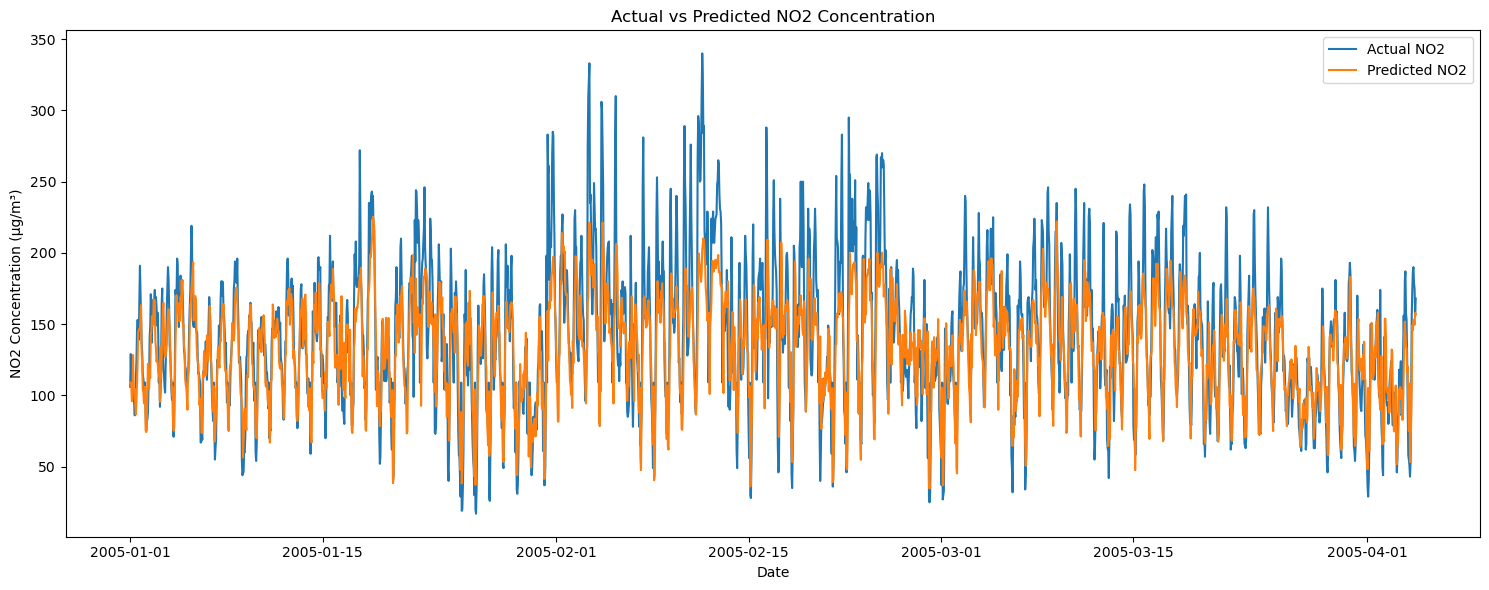

In [251]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test.index, y_test, label="Actual NO2")
# Predicted NO2
plt.plot(y_test.index, rf_y_predict, label="Predicted NO2")
y_test.values[:500]
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

In [353]:
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --------------------------
# Time-aware train/test split
# --------------------------
train = D[:"2004-12-31"]
test = D["2005-01-01":]

X_train, X_test = train[rf_features_all], test[rf_features_all]
y_train, y_test = train["NO2_t+1"], test["NO2_t+1"]

# --------------------------
# LightGBM Regressor
# --------------------------
lgb_model = lgb.LGBMRegressor(random_state=42)

# --------------------------
# Parameter Grid
# --------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'min_child_samples': [10, 20]
}

# --------------------------
# Time-aware Cross-validation
# --------------------------
tscv = TimeSeriesSplit(n_splits=3)

grid = GridSearchCV(
    lgb_model,
    param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',  # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# --------------------------
# Evaluate on Test Set
# --------------------------
best_lgb_model = grid.best_estimator_
lgb_y_pred = best_lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, lgb_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, lgb_y_pred))
r2 = r2_score(y_test, lgb_y_pred)

print("Best parameters:", grid.best_params_)
print("\nLightGBM Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41324
[LightGBM] [Info] Number of data points in the train set: 6942, number of used features: 178
[LightGBM] [Info] Start training from score 103.076779
Best parameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31}

LightGBM Results:
MAE:  19.92
RMSE: 27.52
R²:   0.7052


In [ ]:
# LightGBM Results:
# MAE:  22.57
# RMSE: 30.63
# R²:   0.6349

# LightGBM Results:
# MAE:  20.77
# RMSE: 28.73
# R²:   0.6788

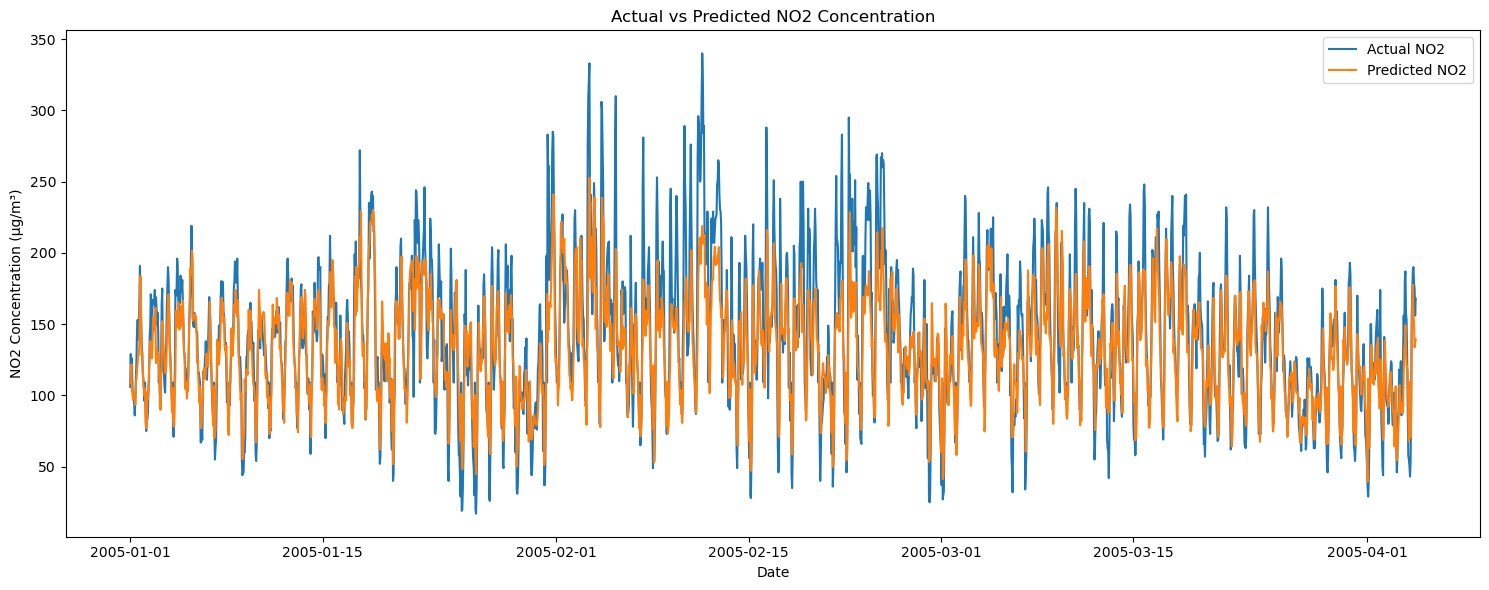

In [354]:
plt.figure(figsize=(15,6))

# Actual NO2
plt.plot(y_test.index, y_test, label="Actual NO2")
# Predicted NO2
plt.plot(y_test.index, lgb_y_pred, label="Predicted NO2")
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (µg/m³)")
plt.title("Actual vs Predicted NO2 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

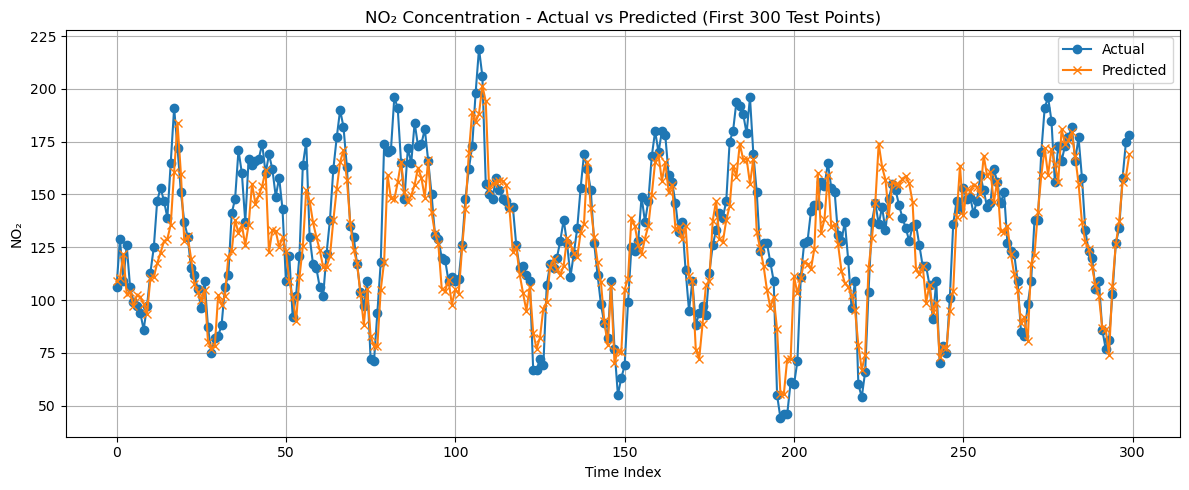

In [355]:
import matplotlib.pyplot as plt

# Plot first 100 predictions (or any subset)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:300], label="Actual", marker='o')
plt.plot(lgb_y_pred[:300], label="Predicted", marker='x')
plt.title("NO₂ Concentration - Actual vs Predicted (First 300 Test Points)")
plt.xlabel("Time Index")
plt.ylabel("NO₂")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


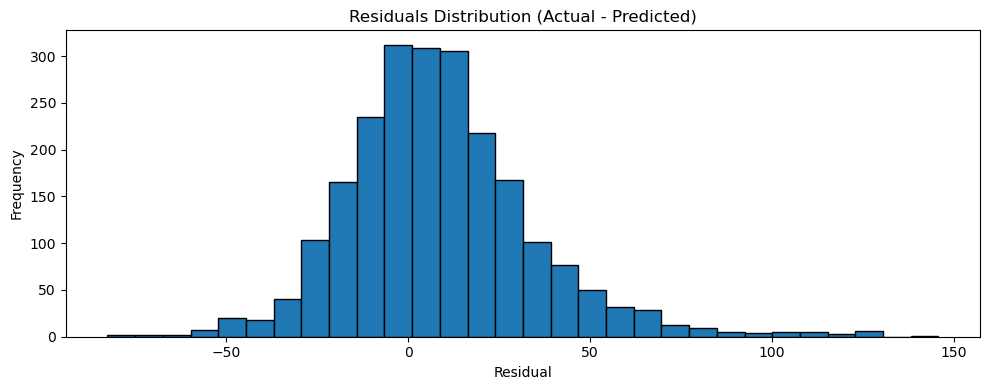

In [356]:
residuals = y_test.values - lgb_y_pred

plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# what to do next? Model selection and evaluation

# check distributions of residuals later on for model diagnostics.

# Model suggestions?
# regularization models like (Ridge, Lasso) which can handle collinearity better
# create a baseline model to compare it with more complex models (Evaluate baseline using metrics like RMSE, MAE, R²)

# Outline:
# Linear Regression (OLS)
# Regularized regression (Ridge, Lasso)
# Tree-based models (Random Forest, Gradient Boosting)
# Use cross-validation (e.g., K-fold) to get robust estimates of model performance.

# Evaluation metrics:
# RMSE (root mean squared error): sensitive to large errors
# MAE (mean absolute error): more robust to outliers
# R² (coefficient of determination): explains variance

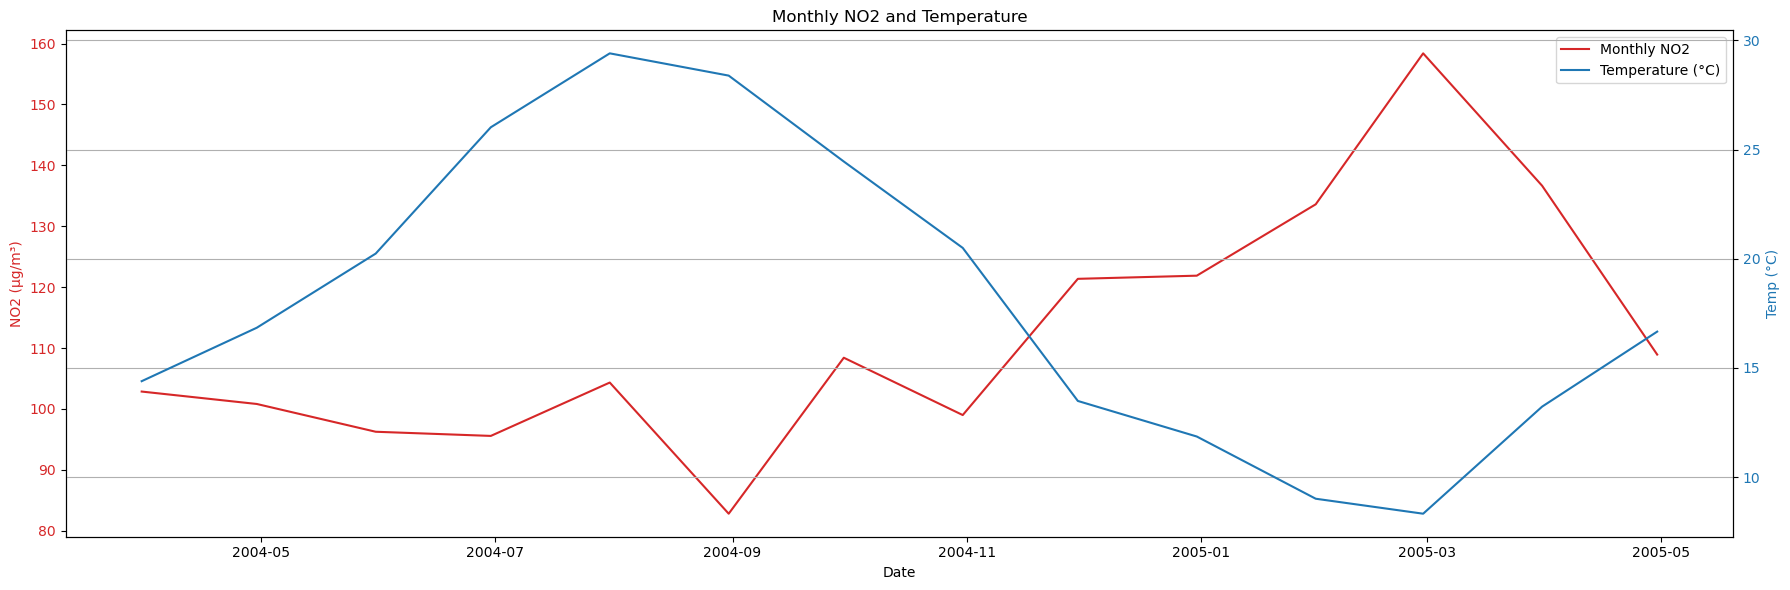

In [30]:
# Comparing Tempature with NO2
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot NO2 on left y-axis
ax1.plot(monthly_NO2.index, monthly_NO2, color="tab:red", label="Monthly NO2")
ax1.set_xlabel("Date")
ax1.set_ylabel("NO2 (µg/m³)", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Creates a second y-axis for temp
ax2 = ax1.twinx()
ax2.plot(monthly_temp.index, monthly_temp, color="tab:blue", label="Temperature (°C)")
ax2.set_ylabel("Temp (°C)", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Combines legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Monthly NO2 and Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

*fig X*: Shows the correlation between monthly NO2 concentration and Temperature, where NO2 rises when Temps drops in winter and vise versa

In [109]:
# Correct correlation on monthly averages
from scipy.stats import pearsonr, spearmanr

# Drop any months where either NO2 or Temp is NaN
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

# Pearson and Spearman on monthly means
pearson_corr, pearson_p = pearsonr(monthly_temp, monthly_NO2)
spearman_corr, spearman_p = spearmanr(monthly_temp, monthly_NO2)

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3g}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3g}")

Pearson correlation: -0.788, p-value: 0.000825
Spearman correlation: -0.815, p-value: 0.000379


A strong and statistically significant negative correlation was found between monthly average temperature and NO₂ concentrations (Pearson: -0.788, p = 0.0008). This confirms that the inverse relationship observed in the plot is not due to random variation but reflects a real seasonal pattern: higher temperatures are associated with lower NO₂ levels, and vice versa.

Temperature (T) and NO₂ concentration (NO2(GT)) have a statistically significant but weak negative correlation.<br>
the relationship (however small) is not due to random chance. Since the p-value is tiny we can be extremely confident the correlation isn't just noise. Thus there is a relationship between temperature and NO₂ levels in your dataset.<br>
But since the correlation's weak (the data points are not tightly clustered around a straight line); Temperature does influence NO₂, but it’s one of many factors and other variables like traffic, wind, season, emissions, etc., probably have stronger or additional effects. So, T and NO₂ are connected, but T alone doesn't explain NO₂ very well.

Prediction intervals<br>
Estimating uncertainty of future predictions<br>
More useful than CIs if your model is going to be used for real-world forecasting

In [ ]:
# Ground Truth vs sesnors comparisons
# Correlation heatmaps
# Time series trends of pollutants




# use cross validation (CV) to evaluate how well a predictive model generalizes to an unseen dataset.
# It helps assess the out-of-sample performance by simulating how the model would perform in real-world scenarios.

# What CV is used for:
# Model evaluation: Measure how well a model generalizes.

# Hyperparameter tuning: Choose parameters (e.g. depth of a decision tree) that yield the best average performance.

# Model selection: Compare different modeling approaches (e.g. logistic regression vs. random forest).

# Data preprocessing evaluation: Evaluate steps like imputation or scaling and see what works best.


# But importantly: You must impute only on the training fold, not the full dataset,
# or you'll leak future information into training → which leads to overfitting.

# Future project improvements is to integrate an API real time to predict future air pollutants from the
# Nasa API: https://api.nasa.gov/
# InSight: Mars Weather Service API